# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Task 1
For every column in the data...

### Part (a) Do values match description in table?
Expected `booking_id` to be type nominal but is actually `int64`.

Expected `days_before` to be `int` type but is actually `object`, which isn't entirely intuitive from the description.

`attended` is of type `int64`, which is reasonably, but given as "nominal" in the description.

Other columns match description given in table as expected.

### Part (b) Number of missing values in each column

`weight` column has 20 missing values. `0` missing values for all other columns.

### Part (c) Make values match description
Convert `booking_id` column to type string by `df['booking_id'] = df['booking_id'].astype(str)`

Got rid of the " days" in `days_before` then converted to `int` by
`df['days_before'] = df['days_before'].str.replace(' days', '').astype(int)`

`attended` is left as is because `int64` type 1 and 0 is more interpretable than nominal/strings of `object` type

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('fitness_class.csv')
print(df.head())
print(df.columns)

   booking_id  months_as_member  weight  ... time  category attended
0           1                17   79.56  ...   PM  Strength        0
1           2                10   79.01  ...   AM      HIIT        0
2           3                16   74.53  ...   AM  Strength        0
3           4                 5   86.12  ...   AM   Cycling        0
4           5                15   69.29  ...   AM      HIIT        0

[5 rows x 8 columns]
Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')


In [15]:
for c in df.columns:
    print(df[c])

0          1
1          2
2          3
3          4
4          5
        ... 
1495    1496
1496    1497
1497    1498
1498    1499
1499    1500
Name: booking_id, Length: 1500, dtype: int64
0       17
1       10
2       16
3        5
4       15
        ..
1495    21
1496    29
1497     9
1498    34
1499    20
Name: months_as_member, Length: 1500, dtype: int64
0       79.56
1       79.01
2       74.53
3       86.12
4       69.29
        ...  
1495    79.51
1496    89.55
1497    87.38
1498    68.64
1499    94.39
Name: weight, Length: 1500, dtype: float64
0        8
1        2
2       14
3       10
4        8
        ..
1495    10
1496     2
1497     4
1498    14
1499     8
Name: days_before, Length: 1500, dtype: object
0       Wed
1       Mon
2       Sun
3       Fri
4       Thu
       ... 
1495    Fri
1496    Mon
1497    Tue
1498    Sun
1499    Thu
Name: day_of_week, Length: 1500, dtype: object
0       PM
1       AM
2       AM
3       AM
4       AM
        ..
1495    AM
1496    AM
1497    

In [16]:
for c in df.columns:
    print(c, df[c].isna().sum())

booking_id 0
months_as_member 0
weight 20
days_before 0
day_of_week 0
time 0
category 0
attended 0


In [17]:
# replace null `weight` values
df['weight'].fillna(df['weight'].mean(), inplace=True)
# match description of data
df['booking_id'] = df['booking_id'].astype(str)
df['days_before'] = df['days_before'].str.replace(' days', '').astype(int)

## Task 2
### Part (a)
The category,`0`, of the `attended` variable has the most observations.
### Part (b)
Observations are not balanced across categories of the variable `attended`.

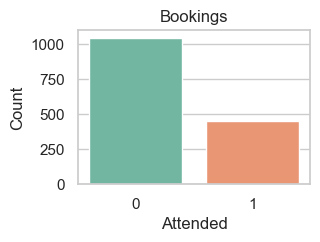

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(3,2))
sns.countplot(data=df, x='attended', palette='Set2')

plt.title('Bookings')
plt.xlabel('Attended')
plt.ylabel('Count')

# Show the plot
plt.show()

In [21]:
df['attended'].value_counts()

0    1046
1     454
Name: attended, dtype: int64

## Task 3: Distribution of `months_as_member`
The distribution is exponentially decreasing w.r.t. number of months as member.
It has a `mean` of 15.628667, `std` of 12.926543, 75th quantile of `19`, and skewness of 3.139781 (skewed right heavily).

In [29]:
df['months_as_member'].describe()

count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64

In [30]:
df['months_as_member'].skew()

3.139781780718212

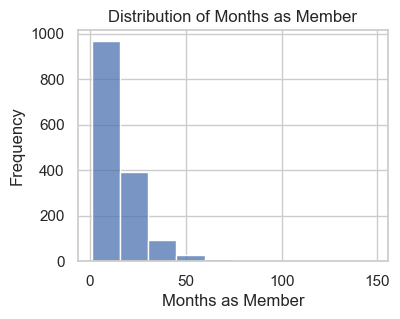

In [28]:
plt.figure(figsize=(4, 3))
sns.histplot(data=df, x='months_as_member', bins=10, palette='Set 2')
plt.title('Distribution of Months as Member')
plt.xlabel('Months as Member')
plt.ylabel('Frequency')
plt.show()

## Task 4: Relationship between attendance and `months_as_member`
There is a somewhat positive correlation between attendance and months as member. Those who did not attend have a lower mean and IQR of months as member than those of members who attend. It seems like all who are members for 60+ months attended.

[Text(0, 0, 'Did not Attend'), Text(1, 0, 'Attended')]

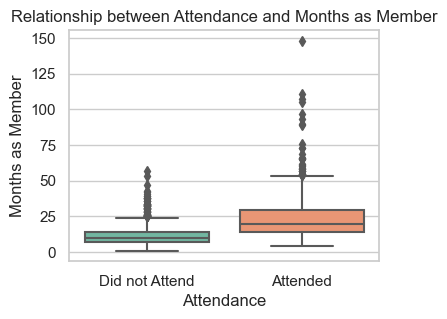

In [42]:
plt.figure(figsize=(4,3))
boxplot = sns.boxplot(data=df, x='attended', y='months_as_member', palette='Set2')

plt.title('Relationship between Attendance and Months as Member')
plt.xlabel('Attendance')
plt.ylabel('Months as Member')

boxplot.set_xticklabels(['Did not Attend', 'Attended'])

## Task 5: Predict whether members will attend
This would be a classification machine learning problem, specifically binary classification of [attend, not attend]

## Task 6: Baseline model to predict
We will be using Logistic Regression as our baseline model for this classification task. We will do a 80-20 data split between train and test data.

In [51]:
# Start coding here... 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X=df.drop(columns=['attended'])
y = df['attended']
X = pd.get_dummies(X, columns=['day_of_week', 'time', 'category'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
logistic_predictions = model.predict(X_test)

## Task 7: Comparison model to predict
Everything is the same as in our baseline model, except we will be using a `DecisionTreeClassifier`

In [52]:
# Start coding here... 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
decision_tree_predictions = model.predict(X_test)

## Task 8: Motivation behind models chosen in tasks 6 & 7
I picked Logistic Regression as a common baseline in classification, especially binary, Machine Learning problems. It is a great low complexity model to start out with as baseline so we can compare against higher complexity models. It has fewer hyperparameters to tune and train fast. Additionally, with regularization such as L1 (Lasso) and L2 (Ridge) it is more intuitive to tune aginst overfitting.
It does assume a linear relationship between the data features and the log-probability outputs of the target varible `attended`.
So for the comparison model I chose a non-linear one of higher complexity. As opposed to LR, Decision Trees can model complex decision boundaries. If needed it would provide information regarding importance of each feature. They are more versatile than LR since they handle categorical and numerical features ~~well.~~

## Task 9: Compare performance of models in tasks 6 & 7
Compared to the Decision Tree Classifier, the baseline Logistic Regression model is more accurate (77% correct vs 69%),
has a better ability to avoid false positive predictions (0.77 vs 0.57. `Precision = True Positives / True Positives + False Positives`, where `True Positives` is number of correct predicted `attended` bookings),
and a higher `F1 score`, which in this case, since both models equal recalls, doesn't give us more information than by observing `Precision`.

Both models have exact equal recall values of 0.475728, `Recall = True Positives / True Positives + False Negatives`, having equal ability to correctly identify positive instances.

In [53]:
# Start coding here... 
# Performance of Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
logistic_precision = precision_score(y_test, logistic_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)

# Performance of Decision Tree Classifier model
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions)
decision_tree_recall = recall_score(y_test, decision_tree_predictions)
decision_tree_f1 = f1_score(y_test, decision_tree_predictions)
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)

# display the metrics side by side
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': [logistic_accuracy, logistic_precision, logistic_recall, logistic_f1],
    'Decision Tree Classifier': [decision_tree_accuracy, decision_tree_precision, decision_tree_recall, decision_tree_f1]
})

print(metrics_df)

      Metric  Logistic Regression  Decision Tree Classifier
0   Accuracy             0.773333                  0.696667
1  Precision             0.777778                  0.569767
2     Recall             0.475728                  0.475728
3   F1 Score             0.590361                  0.518519


## Task 10: Which model is better?
As a result from the discussion in Task 9, since our baseline Logistic Regression model achieves higher accuracy and precision than our Decision Tree Model (and maintains equal levels of Sensitivity (Recall), the Logistic Regression model performs better.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam